# Energy and Power

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

#### Define Signals

In [2]:
def triang_sig(t):
    '''Triangular Finite Duration Pulse'''
    x = 5*t*rect_sig(t-1,2)
    return x

def rect_sig(t,tau):    
    '''Rectangular Pulse of duration tau centered at t=0'''
    x = ((np.heaviside((t + tau/2),1) - np.heaviside((t - tau/2),1)))
    return x

def square_wave(t,T,A):
    '''Square wave of period T and amplitude A'''
    x = A * np.sign(np.sin(2*np.pi*t/T))
    return x

def sigsq(t):
    x = abs(triang_sig(t))**2
    return x

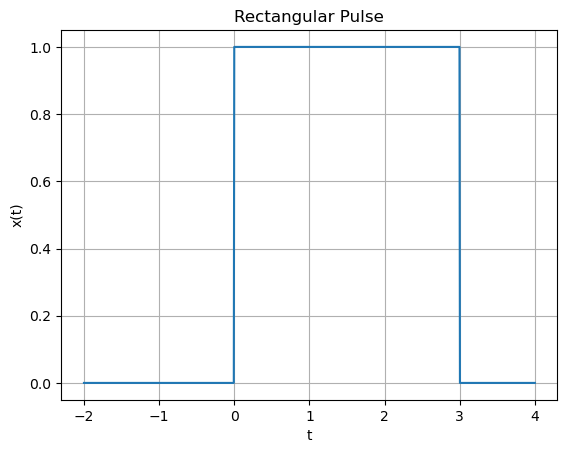

In [5]:
t = np.linspace(-2,4,1000)
plt.plot(t, rect_sig(t-1.5,3))
plt.title
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Rectangular Pulse')   
plt.grid()  

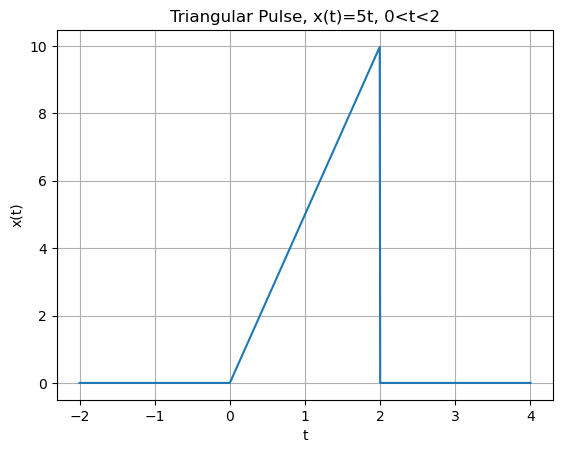

In [6]:
t = np.linspace(-2,4,1000)
plt.plot(t, triang_sig(t))
plt.title
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Triangular Pulse, x(t)=5t, 0<t<2')   
plt.grid()  


#### Energy for an energy signal
$$E = \lim_{T \rarr \infty} \int_{-T/2}^{T/2} |x(t)|^2 dt \ < \ \infty$$
An energy signal must have finite energy for all time as specified by the above integral equation.  An example of an energy signal is shown below where
$$E = \lim_{T \rarr \infty} \int_{-T/2}^{T/2} |5t|^2 [u(t) - u(t-2)] dt = \frac{25}{3}2^3 = 66.67 J

In cases where direct evaluation of the integral is not practical, numerical integration can be used.

In [7]:
result = integrate.quad(sigsq,-np.inf,np.inf)
print(rf'Signal Energy = {result[0]} +/- {result[1]}')

Signal Energy = 66.66666666666552 +/- 1.443900004005627e-07


### Signal with Added Random Noise
Signals with added random noise require numerical integration.  Signal and noise zero outside of the region 0 < t < 2.

Text(0.5, 1.0, 'Signal and Signal with Noise')

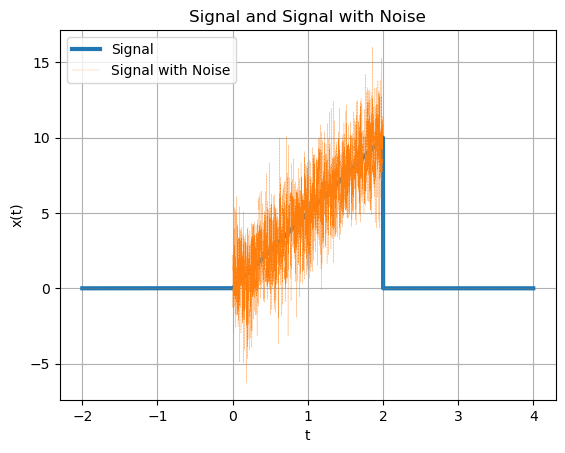

In [8]:
Fs = 1000
t = np.arange(-2,4,1/Fs)
T = 2
x = triang_sig(t)
noise = np.random.normal(0, 2, len(x)) * ((np.heaviside(t,1) - np.heaviside((t - 1),1)) - \
         (np.heaviside(t-1,1) - np.heaviside((t - 2),1)))
y = x + noise
plt.figure()
plt.plot(t,x,linewidth=3,label='Signal')
plt.plot(t,y,linestyle='dashed',linewidth=0.2,label='Signal with Noise')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('Signal and Signal with Noise')


A time series signal that is not defined by a function can be integrated from the time samples.  <br><br>
The energy of the sum of uncorrelated signals equals the sum of the energies of the individual signals.
$$E_{signal with noise} = E_{signal} + E_{noise}$$
(However, the average energy estimates may not exactly meet this equality.  See subsequent example for an explanation.)


In [9]:
E_sig = integrate.trapezoid(abs(x)**2,dx=1/Fs)
E_noise = integrate.trapezoid(abs(noise)**2,dx=1/Fs)
E_sig_noise = integrate.trapezoid(abs(y)**2,dx=1/Fs)
#E_sig_noise = y @ y / Fs
SNR = 10*np.log10(E_sig/E_noise)
print(rf'Signal Energy = {E_sig}')
print(rf'Noise Energy = {E_noise}')
print(rf'Signal with Noise Energy = {E_sig_noise}')
print(rf'Signal Energy + Noise Energy = {E_sig + E_noise}')
print(rf'SNR = {SNR} dB')

Signal Energy = 66.71667499996326
Noise Energy = 8.095712081629944
Signal with Noise Energy = 75.4273166523405
Signal Energy + Noise Energy = 74.8123870815932
SNR = 9.159793395781957 dB


Note: $E_{signal with noise} \ne E_{signal} + E_{noise}$ <br>
This difference is due to numerical round off or truncation errors.

### Periodic Signals
Periodic signals are defined by the following criteria
$$x(t) = x(t + T) \ \forall \ t$$
where T is the period.  <br><br>
Periodic signals will have not have finite energy but may have finite average power
##### Average Power for a power signal
$$P_{avg} = \lim_{T \rarr \infty} \frac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 dt \ < \ \infty$$
Average power is the average energy over the period T.  Power signals have finite power but infinite energy. <br><br>
Periodically extending the above triangular function with T = 2.

In [10]:
print(rf'Average Signal Power, P_avg = {E_sig / T}')
print(rf'Average Noise Power, P_noise = {E_noise / T}')
print(rf'Average Signal with Noise Power = {E_sig_noise / T}')

Average Signal Power, P_avg = 33.35833749998163
Average Noise Power, P_noise = 4.047856040814972
Average Signal with Noise Power = 37.71365832617025


## Square Wave Signal
A single cycle of a periodic square wave with period T = 2 sec along with added gaussian noise is shown below.

Text(0.5, 1.0, 'Signal and Signal with Noise')

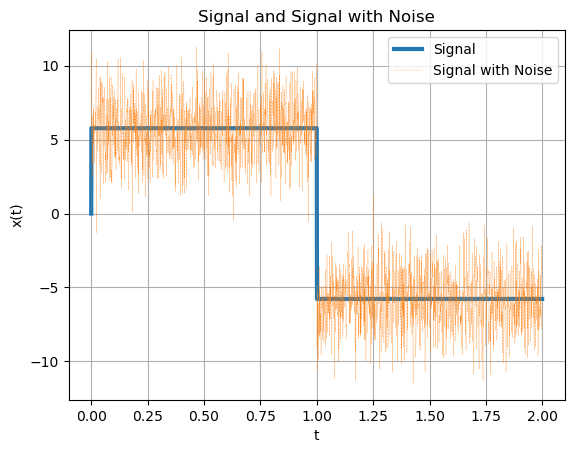

In [11]:
Fs = 1000
t = np.arange(0,2,1/Fs)
T = 2
x = square_wave(t, T, 5.775)
noise = np.random.normal(0,T, len(x))
y = x + noise
plt.figure()
plt.plot(t,x,linewidth=3,label='Signal')
plt.plot(t,y,linestyle='dashed',linewidth=0.2,label='Signal with Noise')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('Signal and Signal with Noise')

In [12]:

E_sig = integrate.trapezoid(abs(x)**2,dx=1/Fs)
P_sig = E_sig / T
E_noise = integrate.trapezoid(abs(noise)**2,dx=1/Fs)
P_noise = E_noise / T
E_sig_noise = integrate.trapezoid(abs(y)**2,dx=1/Fs)
P_sig_noise = E_sig_noise / T
'''
E_sig = x @ x / Fs
E_noise = noise @ noise / Fs
E_sig_noise = y @ y / Fs
'''
SNR = 10*np.log10(E_sig/E_noise)
print(rf'Signal Power = {P_sig}')
print(rf'Noise Power = {P_noise}')
print(rf'Signal with Noise Power = {P_sig_noise}')
print(rf'Signal Power + Noise Power = {P_sig + P_noise}')
print(rf'SNR = {SNR} dB')

Signal Power = 33.32561203125001
Noise Power = 4.044507988949323
Signal with Noise Power = 37.708828256343864
Signal Power + Noise Power = 37.37012002019933
SNR = 9.159124364634328 dB
